In [54]:
import numpy as np
import pandas as pd
import scipy.linalg as LA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg
from PIL import Image
from scipy.misc import imread

Problem 1: Create a vector in S that is different from v1,v2,v3,v4

Note that S is spans two dimensions, as shown by the two pivots when in upper triangular form. The linearly independent vectors are hence v1 and v2, and a new vector v_new can be constructed by a linear combination of v1 and v2. Here, we choose v1 + v2.# 

In [12]:
v1 = np.array((1,2,3,4))
v2 = np.array((0,1,0,1))
v3 = np.array((1,4,3,6))
v4 = np.array((2,11,6,15))


mat = np.column_stack((v1,v2,v3,v4))
p,l,u = LA.lu(mat)

print 'Upper Triangular Form (Has 2 Pivots):'
print u


v_new = v1 + v2
print '\nNew Vector in S'
print v_new

Upper Triangular Form (Has 2 Pivots):
[[  4.00000000e+00   1.00000000e+00   6.00000000e+00   1.50000000e+01]
 [  0.00000000e+00  -7.50000000e-01  -1.50000000e+00  -5.25000000e+00]
 [  0.00000000e+00   0.00000000e+00   5.55111512e-17   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00  -9.71445147e-17]]

New Vector in S
[1 3 3 5]


Problem 1: Create a number not in S

This can be accomplished if a new vector, v5, produces atleast 3 pivots when in upper triangular form. That is, v5 must be linearly independent, and hence not in  S, if a matrix composed of v1,v2,v3,v5 has 3 pivots (previously S had 2 pivots).

In [13]:
v5 = np.array((1,2,3,5))
mat = np.column_stack((v1,v2,v3,v5))
p,l,u = LA.lu(mat)

print 'Upper Triangular Form (Has 3 Pivots):'
print u

print '\nNew Vector(v5):'
print v5

Upper Triangular Form (Has 3 Pivots):
[[  4.00000000e+00   1.00000000e+00   6.00000000e+00   5.00000000e+00]
 [  0.00000000e+00  -7.50000000e-01  -1.50000000e+00  -7.50000000e-01]
 [  0.00000000e+00   0.00000000e+00   5.55111512e-17  -1.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00  -5.00000000e-01]]

New Vector(v5):
[1 2 3 5]


Problem 1: Part 2

S's dimension is equal to the rank of its matrix, which is also equal to the number of pivots.
As shown earlier, the matrix has two pivots. Hence, S has two dimensions.

In [14]:
mat = np.column_stack((v1,v2,v3,v4))
p,l,u = LA.lu(mat)

print 'Upper Triangular Form (Has 2 Pivots):'
print u

Upper Triangular Form (Has 2 Pivots):
[[  4.00000000e+00   1.00000000e+00   6.00000000e+00   1.50000000e+01]
 [  0.00000000e+00  -7.50000000e-01  -1.50000000e+00  -5.25000000e+00]
 [  0.00000000e+00   0.00000000e+00   5.55111512e-17   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00  -9.71445147e-17]]


Problem 1: Part 3: Find the Orthonormal basis

In [15]:
orthMat = LA.orth(mat)
print orthMat

[[-0.1098991   0.2669373 ]
 [-0.54396107 -0.53613402]
 [-0.32969731  0.80081189]
 [-0.76375927 -0.00225943]]


Problem 1: Part 4: Optimiazation Problem

We first ompute Q, the projection matrix, which is defined for an arbitrary matrix A as A(A^T A)^-1 * A^T * Y, where the *'s represent matrix multiplication. Then we can calculate the projection of Z onto the subspace by applying the transformation.

In [16]:
z = np.array([1,0,0,0])
mat = orthMat
mat = np.array(mat)

middle = np.linalg.inv(np.dot(mat.T, mat))
Q = np.matmul(np.matmul(mat, middle), mat.T)


print 'Projected Vector onto S:'
print np.matmul(Q, z)

Projected Vector onto S:
[ 0.08333333 -0.08333333  0.25        0.08333333]


Problem 2: Part 1

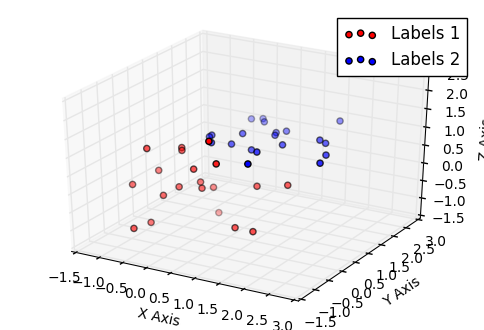

In [17]:
mean1 = [0,0,0]
cov1 = [[.5, 0, 0], [0, .5, 0], [0, 0, .7]]
label1 = np.random.multivariate_normal(mean1, cov1, 20)

mean2 = [1,1,1]
cov2 = [[.5, 0, 0], [0, .5, 0], [0, 0, .01]]
label2 = np.random.multivariate_normal(mean2, cov2, 20)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(label1.T[0], label1.T[1], label1.T[2], c='r', label='Labels 1')
ax.scatter(label2.T[0], label2.T[1], label2.T[2], c='b', label= 'Labels 2')

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.legend()
plt.show()

Problem 2: Part 2:

The spread of the set Label 1 is significantly more in the Z Axis than the set of Label 2. This is reasonable since the covariance matrix of labels 1 has a .7 covariance in Z, whereas the covariance matrix of labels 2 has only .01 in Z. So, Labels 2 are closer to the mean in the Z Axis and have a small spread. Labels 1 are centered around 0 in the Z axis and are not as clustered.

Problem 2: Part 3: Find Covariance Matrix of X:

In [18]:
X = np.concatenate((label1, label2))

x = X.T[0]
y = X.T[1]
z = X.T[2]

meanx = np.mean(x)
meany = np.mean(y)
meanz = np.mean(z)

length = len(x) - 1

covMat = [ [np.sum((x - meanx)**2)/length , np.sum((x - meanx)*(y - meany))/length, np.sum((x - meanx)*(z - meanz))/length ],
        [np.sum((y - meany)*(x - meanx))/length, np.sum((y - meany)**2)/length, np.sum((y - meany)*(z - meanz))/length],
        [np.sum((z - meanz)*(x - meanx))/length, np.sum((z - meanz)*(y - meany))/length, np.sum((z - meanz)**2)/length] ]

print 'Calculated Covariance:' + str(covMat)

print 'Actual Coviariance: \n' + str(np.cov(X.T))

Calculated Covariance:[[0.76456052990486179, 0.23298974067252085, 0.24677411429289101], [0.23298974067252085, 0.8124435870490796, 0.21883199906480569], [0.24677411429289101, 0.21883199906480569, 0.55578815960260075]]
Actual Coviariance: 
[[ 0.76456053  0.23298974  0.24677411]
 [ 0.23298974  0.81244359  0.218832  ]
 [ 0.24677411  0.218832    0.55578816]]


Problem 2 Part 4:

In [19]:
# INCOMPLETE

Problem 3 Part 1

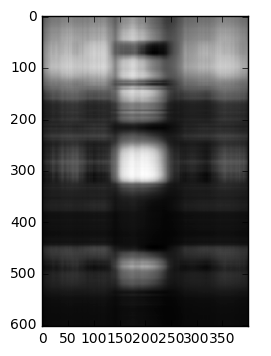

In [69]:
def lowRankApproximation(rank):
    im = imread('mona_lisa.png',flatten=True)
    
    u,s,v = np.linalg.svd(im, full_matrices='true');

    rank2 = s[:]
    rank2[rank:] = 0

    result = np.diag(rank2)
    S = np.zeros(im.shape)
    S[:400, :400] = result
    rank2_approx = np.matmul(np.matmul(u,  S), v)
    plt.imshow(rank2_approx, cmap='Greys_r')
    
lowRankApproximation(2)    
plt.show()


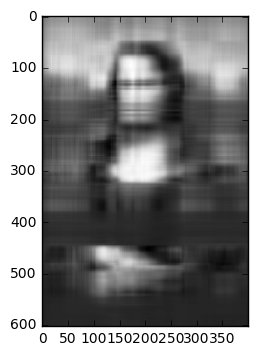

In [65]:
lowRankApproximation(5)    
plt.show()

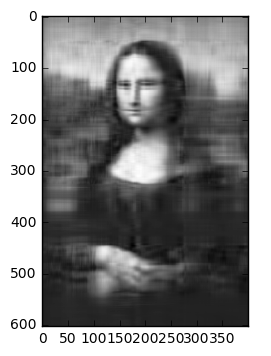

In [66]:
lowRankApproximation(10)    
plt.show()

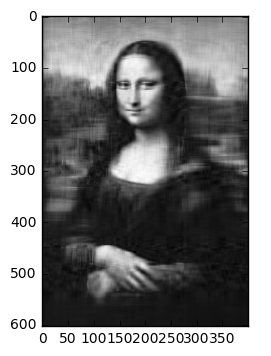

In [67]:
lowRankApproximation(20)    
plt.show()